In [ ]:
# https://zhuanlan.zhihu.com/p/692810462 RF
# https://zhuanlan.zhihu.com/p/692505141 SVM

# https://zhuanlan.zhihu.com/p/112009086 Xboost

In [2]:
setwd('/import/DB/fel/BJTC-204')

In [3]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
load('jiaocha.rda')

In [5]:
load('./exp4.rda')

In [6]:
dim(exp4)

[1]   251 11882

In [7]:
exp4 = exp4 %>%  dplyr::filter(Gender == 'M')

In [8]:
colnames(exp4) = gsub('-','.',colnames(exp4))

In [9]:
male.gene = read.csv('diffgene2.csv',row.names = 1)

In [10]:
male.gene = male.gene %>% dplyr::filter(change != 'NOT') %>% rownames()

In [11]:
expr = exp4[,male.gene]

In [12]:
#expr[,1:dim(expr)[2]] = 2^expr[,1:dim(expr)[2]] -1

In [13]:
head(expr)

,SYT5,ATP10B,PRSS3,FBXL2,PHKG1,SYP,PTPRN,PTMS,DAAM2,NELL1,...,PIN1,TUSC3,SSBP3,TUBB4,RBP4,SEPP1,EFEMP1,DYNC1I1,GABRD,ENO2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431721,6.072172,8.180086,7.752138,9.077388,6.755411,7.342586,7.146758,5.443910,7.504072,8.125692,...,7.854175,8.290631,10.414346,8.866506,6.985588,8.719438,6.108822,8.938026,7.918141,9.875480
GSM2431726,5.932612,8.010908,7.969423,8.329847,7.217372,6.781492,6.703327,6.644667,9.109535,6.429658,...,6.526439,6.774439,10.754375,8.955523,6.132049,10.452414,7.132595,6.870775,7.065275,8.771113
GSM2431727,7.118367,7.752621,7.868202,8.822679,6.696205,8.619993,7.785840,7.567475,9.767533,8.326566,...,8.108739,8.840250,10.292301,10.842200,7.504695,9.870438,6.823899,9.667712,8.916391,11.196003
GSM2431728,6.871340,8.035140,8.225899,9.494264,6.601586,8.264629,8.008771,7.283869,8.659156,8.480912,...,8.366098,8.989155,10.627328,10.160211,7.487244,9.373322,6.028617,10.133312,8.666038,11.189176
GSM2431731,5.745391,8.374348,7.462840,8.914534,7.290843,7.292795,6.873819,5.386840,8.522407,7.902626,...,8.011993,8.374939,9.279633,8.999374,7.338462,10.779470,7.252412,9.450110,7.379146,10.373573
GSM2431734,6.502885,7.866380,7.667150,8.943164,6.688234,8.300522,7.633397,7.351038,9.376408,6.866118,...,7.966432,7.435354,10.323017,11.078138,7.565677,9.674459,8.738763,9.255374,8.008541,10.932148


In [14]:
type = exp4$TYPE

In [15]:
type = ifelse(type == 'MDD',1,0)

In [16]:
y = type

In [17]:
colnames(expr) = gsub('-','.',colnames(expr))

In [18]:
expr <- expr[, !grepl("^\\d+", names(expr))]

In [19]:
library(dplyr)

In [20]:
x = as.matrix(expr)
y = y

In [21]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 4.2.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine




In [22]:
options(repr.plot.width = 5,repr.plot.height = 5)

png 
  2

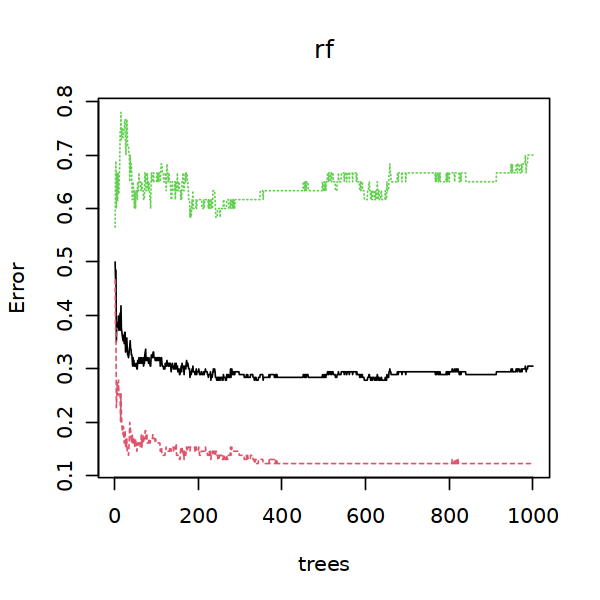

In [23]:
set.seed(100)
rf = randomForest(as.factor(y)~.,data = x,ntree =1000,important=TRUE,proximity=TRUE)
plot(rf)
pdf('./figure/fig2.forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

png 
  2

ATP10B     SYT5    NPTX1    FBXL2    PHKG1    SEPP1     NPM1 HIST1H4C 
4.573455 4.351994 4.068872 3.850255 3.753370 3.734221 3.154575 3.042609 
   PRSS3     PTMS    SSBP3    DAAM2     LY6H  DYNC1I1     HPCA    NELL1 
3.003050 2.955449 2.858859 2.841593 2.821994 2.775311 2.597506 2.585627 
   ACOT7    TUSC3     RBP4    TUBB4   ATP1A3     PIN1    GABRD    EIF4E 
2.511707 2.465219 2.461653 2.370029 2.353821 2.264304 2.202182 2.137539 
     SYP     ENO2   EFEMP1    PTPRN    CALM3 
2.119418 2.106431 2.069687 2.046768 1.597008

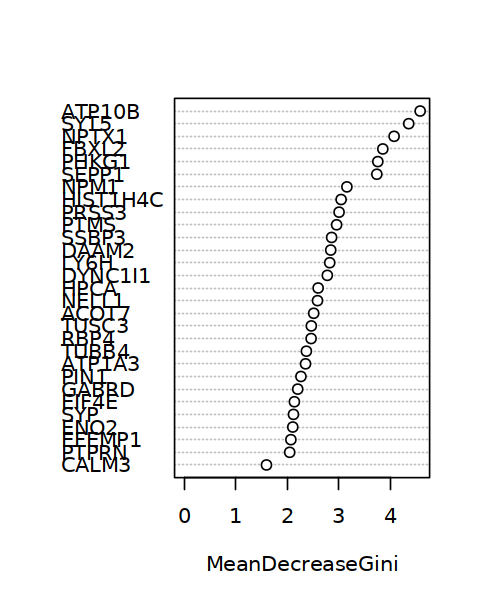

In [24]:


trees = which.min(rf$err.rate[,1])

rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)

importance = importance(rf)

pdf('./figure/fig3.forest2.pdf',height = 6,width = 4)
varImpPlot(rf,main = '')
dev.off()

# RPE65 + MC3R+NFIL3 + PRF1 + IL6

options(repr.plot.width = 4)

varImpPlot(rf,main = '')

rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] #重要性评分大于2的基因

rfGenes

In [25]:
# rfGenes=names(rfGenes[rfGenes>30]) 
# write.table(rfGenes,file="rfGenes.txt",sep="\t",quote=F,col.names=F,row.names=F) #输出表达量

# # expr2 = exp4

# # sigExp=expr2[rfGenes,]
# # write.table(data.frame(ID=rownames(sigExp),sigExp),file="rfGeneExp.txt",sep="\t",quote=F,col.names=T,row.names=F) 

# # rfGenes

### svm

In [24]:
Type = type

In [25]:
library(tidyverse)
library(glmnet)
library(VennDiagram)
library(e1071)
library(caret)
library(randomForest)

x = as.matrix(expr)

y=as.numeric(as.factor(Type))

library(future)
plan("multisession",workers=30)

set.seed(1)
rfeControl = rfeControl(functions = caretFuncs,
                        method = "cv", # 默认自助法重采样 boot
                        saveDetails = T, # 保存预测值和变量重要性
                        number = 5, # 重抽样次数
                        allowParallel = T # 允许多线程，用这个之前你要先准备好多线程！
                        )

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v readr     2.1.4
v ggplot2   3.5.1     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x randomForest::combine() mas

In [26]:
Profile=rfe(x=x,y=as.factor(y),sizes =c(1:25),
    rfeControl =  rfeControl,
    methods="svmRadial")

Profile



note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid 

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid 

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid 

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid 

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid 


Recursive feature selection

Outer resampling method: Cross-Validated (5 fold) 

Resampling performance over subset size:

 Variables Accuracy    Kappa AccuracySD KappaSD Selected
         1   0.5947  0.04152    0.03991 0.13722         
         2   0.6421  0.04795    0.04403 0.14416         
         3   0.6105 -0.01662    0.02202 0.09528         
         4   0.6105  0.01216    0.06812 0.20923         
         5   0.6211  0.03629    0.07807 0.19494         
         6   0.6211  0.03295    0.06862 0.19272         
         7   0.6526  0.13487    0.07302 0.21987         
         8   0.6789  0.18391    0.09740 0.26637         
         9   0.6895  0.20992    0.09561 0.26391         
        10   0.7053  0.24468    0.08807 0.27593         
        11   0.6947  0.21014    0.10293 0.29190         
        12   0.7105  0.24941    0.11915 0.32761        *
        13   0.6895  0.20576    0.09740 0.28399         
        14   0.6947  0.20953    0.09597 0.27787         
        15   0.6947  

In [27]:
Profile


Recursive feature selection

Outer resampling method: Cross-Validated (5 fold) 

Resampling performance over subset size:

 Variables Accuracy    Kappa AccuracySD KappaSD Selected
         1   0.5947  0.04152    0.03991 0.13722         
         2   0.6421  0.04795    0.04403 0.14416         
         3   0.6105 -0.01662    0.02202 0.09528         
         4   0.6105  0.01216    0.06812 0.20923         
         5   0.6211  0.03629    0.07807 0.19494         
         6   0.6211  0.03295    0.06862 0.19272         
         7   0.6526  0.13487    0.07302 0.21987         
         8   0.6789  0.18391    0.09740 0.26637         
         9   0.6895  0.20992    0.09561 0.26391         
        10   0.7053  0.24468    0.08807 0.27593         
        11   0.6947  0.21014    0.10293 0.29190         
        12   0.7105  0.24941    0.11915 0.32761        *
        13   0.6895  0.20576    0.09740 0.28399         
        14   0.6947  0.20953    0.09597 0.27787         
        15   0.6947  

In [28]:
pdf(file="SVM-RFE.pdf", width=6, height=5.5)
par(las=1)
x= Profile$results$Variables 
y =Profile$results$RMSE
plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
lines(x, y, col="darkgreen")
wmin=which.min(y) 
wmin.x=x[wmin] 
wmin.y=y[wmin]
points(wmin.x, wmin.y, col="blue", pch=16)
text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)
dev.off()

ERROR: Error in text.default(wmin.x, wmin.y, paste0("N=", wmin.x), pos = 2, col = 2): no coordinates were supplied


In [ ]:


par(las=1)
x= Profile$results$Variables 
y =Profile$results$RMSE
plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
lines(x, y, col="darkgreen")
wmin=which.min(y) 
wmin.x=x[wmin] 
wmin.y=y[wmin]
points(wmin.x, wmin.y, col="blue", pch=16)
text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)

#输出
featureGenes = Profile$optVariables
write.table(file="SVM-RFE.gene.txt",featureGenes,sep="\t",quote=F,row.names=F,col.names=F) #表达矩阵 

featureGenes

### Boruta

[1] 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 [38] 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1
 [75] 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0
[112] 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1

Boruta performed 299 iterations in 18.48234 secs.
 9 attributes confirmed important: ACOT7, ATP10B, DYNC1I1, FBXL2, NPM1
and 4 more;
 19 attributes confirmed unimportant: ATP1A3, CALM3, DAAM2, EFEMP1,
EIF4E and 14 more;
 1 tentative attributes left: HIST1H4C;


Tentative Confirmed  Rejected 
        1         9        19 

SYT5    ATP10B     PRSS3     FBXL2     PHKG1       SYP     PTPRN      PTMS 
Confirmed Confirmed  Rejected Confirmed Confirmed  Rejected  Rejected  Rejected 
    DAAM2     NELL1      HPCA     ACOT7    ATP1A3     NPTX1      NPM1  HIST1H4C 
 Rejected  Rejected  Rejected Confirmed  Rejected Confirmed Confirmed Tentative 
    EIF4E      LY6H     CALM3      PIN1     TUSC3     SSBP3     TUBB4      RBP4 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
    SEPP1    EFEMP1   DYNC1I1     GABRD      ENO2 
Confirmed  Rejected Confirmed  Rejected  Rejected 
Levels: Tentative Confirmed Rejected

Boruta performed 299 iterations in 18.48234 secs.
 9 attributes confirmed important: ACOT7, ATP10B, DYNC1I1, FBXL2, NPM1
and 4 more;
 19 attributes confirmed unimportant: ATP1A3, CALM3, DAAM2, EFEMP1,
EIF4E and 14 more;
 1 tentative attributes left: HIST1H4C;

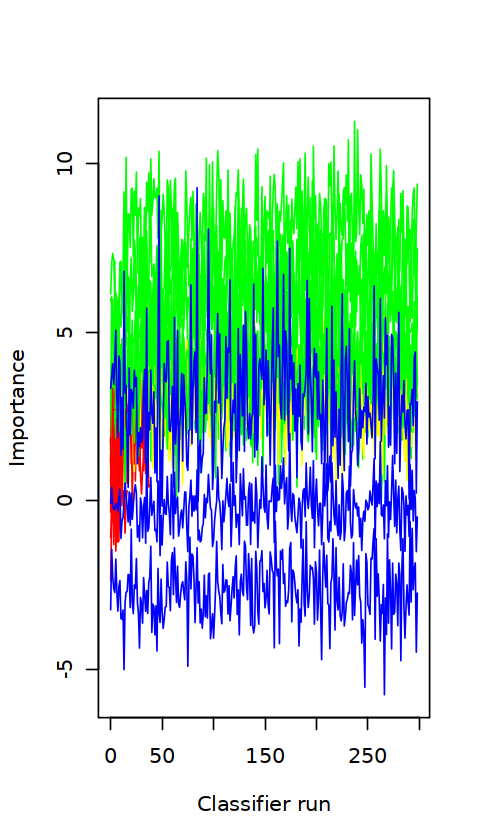

In [51]:
library(Boruta)

y

set.seed(111)
boruta <- Boruta(x=x, y=y, pValue=0.05, mcAdj=T, 
       maxRuns=300)

boruta

table(boruta$finalDecision)

boruta$finalDecision

Boruta::plotImpHistory(boruta)

library(dplyr)
boruta.imp <- function(x){
  imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
  colnames(imp) <- c("Variable","Importance")
  imp <- imp[is.finite(imp$Importance),]

  variableGrp <- data.frame(Variable=names(x$finalDecision), 
                            finalDecision=x$finalDecision)

  showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
                        finalDecision=c("shadowMax", "shadowMean", "shadowMin"))

  variableGrp <- rbind(variableGrp, showGrp)

  boruta.variable.imp <- merge(imp, variableGrp, all.x=T)

  sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
    summarise(median=median(Importance)) %>% arrange(median)
  sortedVariable <- as.vector(sortedVariable$Variable)


  boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)

  invisible(boruta.variable.imp)
}
boruta.variable.imp <- boruta.imp(boruta)


boruta

# library(YSX)

# sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
#            legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
#            xtics_angle = 90)

# expr = cbind(Type,expr)

# colnames(expr)[1]  ='Group'

# expr3 = expr

# set.seed(147)  
# index <-  which( (1:nrow(expr3))%%3 == 0 )
# train <- expr3[-index,]
# test <- expr3[index,]

# table(test$Group)

# library("xgboost")
# library("Matrix")
# train_matrix <- sparse.model.matrix(Group ~ .-1, data = train)
# test_matrix <- sparse.model.matrix(Group ~ .-1, data = test)
# all_matrix <- sparse.model.matrix(Group ~ .-1, data = expr3)



# train_label <- as.numeric(train$Group == 'MDD')
# test_label <-  as.numeric(test$Group == 'MDD')
# all_label <-  as.numeric(expr3$Group == 'MDD')

# all_label

# train_fin <- list(data=train_matrix,label=train_label) 
# test_fin <- list(data=test_matrix,label=test_label) 
# all_fin <- list(data=all_matrix,label=all_label) 

# dtrain <- xgb.DMatrix(data = train_fin$data, label = train_fin$label) 
# dtest <- xgb.DMatrix(data = test_fin$data, label = test_fin$label)
# dall <- xgb.DMatrix(data = all_fin$data, label = all_fin$label)

# xgb <- xgboost(data = dall,max_depth=6, eta=0.5,  
#   objective='binary:logistic', nround=25)

# xgb

# importance <- xgb.importance(all_matrix@Dimnames[[2]], model = xgb)  
# head(importance)
# xgb.ggplot.importance(importance)

# xgb.plot.importance(importance)

In [52]:
# lasso

Warning message:
"package 'lars' was built under R version 4.2.3"
Loaded lars 1.3




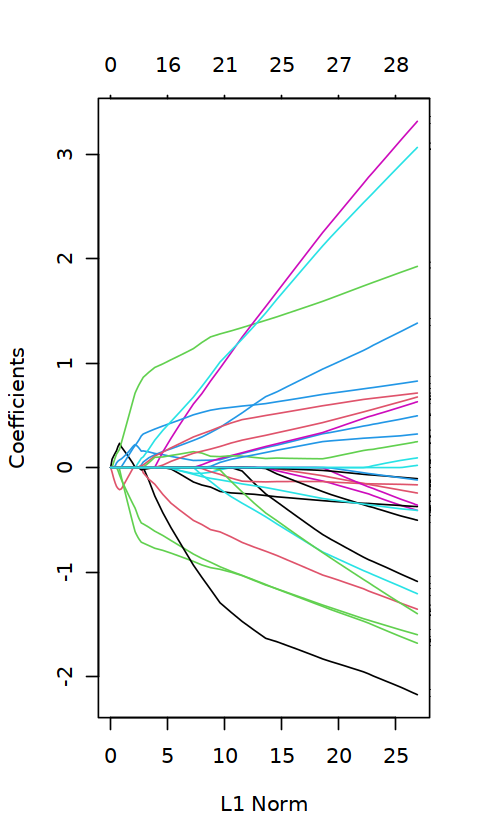

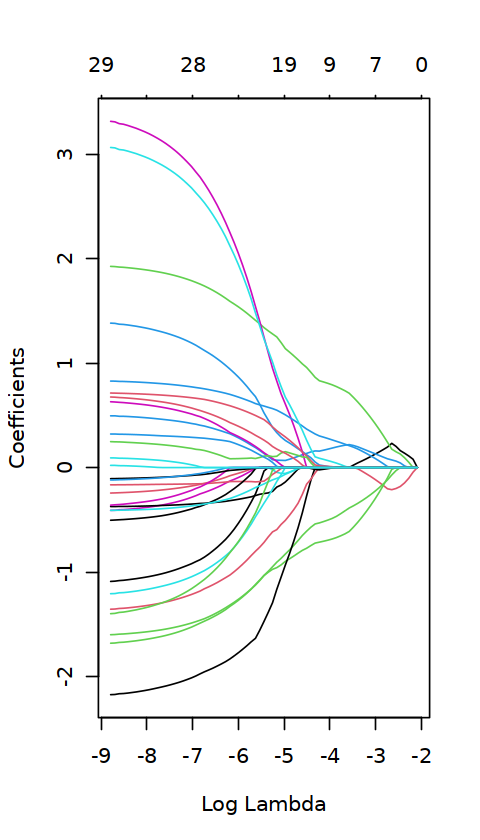

[1] 0.01751294 0.07070003

[1] "SYT5"   "ATP10B" "PRSS3"  "FBXL2"  "DAAM2"  "NPM1"

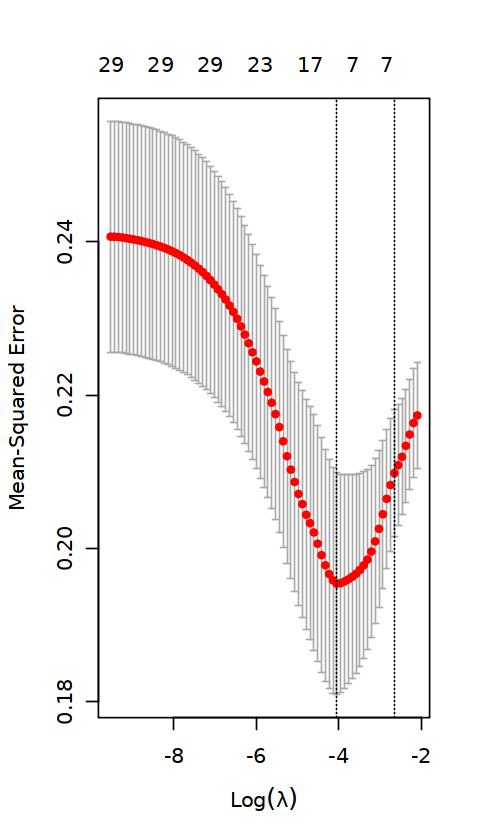

In [53]:
library(lars) 
library(glmnet) 

#用基因的表达情况预测生死
model_lasso <- glmnet(x, y, family="binomial", nlambda=100, alpha=1)#拉手回归模型
plot(model_lasso, xvar = "norm", label = TRUE)

plot(model_lasso, xvar="lambda", label=TRUE)

cv_fit <- cv.glmnet(x=x, y=y, alpha = 1, nlambda = 100)

plot(cv_fit)
# 两条虚线分别指示了两个特殊的λ值:
c(cv_fit$lambda.min,cv_fit$lambda.1se) 

model_lasso <- glmnet(x=as.matrix(x), y=y, alpha = 1, lambda=cv_fit$lambda.1se	)
gene_1se <- rownames(model_lasso$beta)[as.numeric(model_lasso$beta)!=0]
gene_1se = gsub('[.]',' ',gene_1se)

gene_1se

# ### 韦恩图

# importance$Feature

# RF.gene = names(rfGenes)[1:10]
# #SVF.RFE.gene = featureGenes
# XGBoost.gene = importance$Feature[1:10]

# boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()

# Boruta.gene = as.vector(boruta.variable.imp2$Variable)

# lasso.gene  = gene_1se

# list1 = list(RF.gene,lasso.gene,Boruta.gene,XGBoost.gene)

# data =  as.data.frame (do.call (cbind, list1))


# library(venn)
#         library(VennDiagram)
#         color=c( "#3C5488B2","#00A087B2", 
#              "#F39B7FB2","#91D1C2B2", 
#              "#8491B4B2", "#DC0000B2", 
#              "#7E6148B2","yellow", 
#              "darkolivegreen1", "lightskyblue", 
#              "darkgreen", "deeppink", "khaki2", 
#              "firebrick", "brown1", "darkorange1", 
#              "cyan1", "royalblue4", "darksalmon", 
#              "darkgoldenrod1", "darkseagreen", "darkorchid")

#     if (ncol(data) == 2){
#         sample_list <- list(c1 = data[,1], c2 = data[,2])
#     }else if(ncol(data) == 3){
#         sample_list <- list(RF.gene = data[,1], Boruta.gene = data[,2], XGBoost.gene = data[,3])
#     }else if(ncol(data) == 4){
#         sample_list <- list(RF.gene = data[,1], SVF.RFE.gene = data[,2], Boruta.gene = data[,3], XGBoost.gene = data[,4])
#     }else{
#         sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4], c5 = data[,5])
#     }
    
#     q <- venn.diagram(sample_list,filename = NULL,
#              fill = color[1:(length(sample_list))],
#              alpha = 0.50, cat.col = rep('black', ncol(data)), 
#              col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
#                              )
#     pdf(paste0('./',"venn.pdf"))
#     grid.draw(q)
#     dev.off()

# grid.draw(q)

# intersect(intersect(intersect(RF.gene,XGBoost.gene),Boruta.gene),lasso.gene)

# model.gene = intersect(lasso.gene,XGBoost.gene)



# model.gene  =lasso.gene

# model.gene

In [26]:
set.seed(1234)

In [27]:
expr3 = cbind(y,x) %>%  as.data.frame()

In [28]:
colnames(expr3)[1] = 'Group'

In [29]:
expr4 = expr3 

In [30]:
dim(expr4)

[1] 190  30

In [31]:
model.gene = colnames(expr4)[2:dim(expr4)[2]]

In [32]:
library(caret)
library(ggplot2)

 a = c()
# 
for (i in model.gene){
    res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
         ci=TRUE, # 显示95%CI
         #percent=TRUE, # 是否需要以百分比显示
         smooth=FALSE,# 是否平滑曲线
         levels=c(0,1),direction="<" #设置分组方向
         )
    if (res$auc > 0.6){
        a = append(a,i)
        print(paste0(i,' ',res$auc))
        p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
  theme_bw() + # 设置背景
  ggtitle(paste0(i," ROC Curve"))+
  theme(plot.title = element_text(hjust = 0.5,size = 16),
        axis.text=element_text(size=12,colour = "black"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))
p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
  annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
    ggsave(file = paste0(i,'.ROC.pdf'))
}else{
        
}

    
    }

Warning message:
"package 'caret' was built under R version 4.2.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"

Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"


[1] "SYT5 0.664102564102564"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PRSS3 0.66525641025641"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "FBXL2 0.684615384615385"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SYP 0.641794871794872"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PTPRN 0.649871794871795"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PTMS 0.638974358974359"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "NELL1 0.643589743589744"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "HPCA 0.630384615384615"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ACOT7 0.643333333333333"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ATP1A3 0.65025641025641"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "NPTX1 0.628205128205128"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "HIST1H4C 0.606153846153846"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "LY6H 0.620384615384615"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "CALM3 0.621025641025641"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "TUSC3 0.614487179487179"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "TUBB4 0.623076923076923"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "DYNC1I1 0.639615384615385"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "GABRD 0.608205128205128"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ENO2 0.623076923076923"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 191 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


### 批量单因素逻辑回归

In [33]:
a

[1] "SYT5"     "PRSS3"    "FBXL2"    "SYP"      "PTPRN"    "PTMS"    
 [7] "NELL1"    "HPCA"     "ACOT7"    "ATP1A3"   "NPTX1"    "HIST1H4C"
[13] "LY6H"     "CALM3"    "TUSC3"    "TUBB4"    "DYNC1I1"  "GABRD"   
[19] "ENO2"

In [34]:
boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()
Boruta.gene = as.vector(boruta.variable.imp2$Variable)

ERROR: Error in dplyr::filter(., finalDecision %in% c("Confirmed", "Tentative")): object 'boruta.variable.imp' not found


In [63]:
Boruta.gene

[1] "ACOT7"    "ATP10B"   "DYNC1I1"  "FBXL2"    "HIST1H4C" "NPM1"    
 [7] "NPTX1"    "PHKG1"    "SEPP1"    "SYT5"

In [64]:
gene_1se

[1] "SYT5"   "ATP10B" "PRSS3"  "FBXL2"  "DAAM2"  "NPM1"

In [35]:
rfgene = names(rfGenes)[1:20]

In [36]:
gene = intersect(rfgene,a)

In [37]:
gene

[1] "SYT5"     "NPTX1"    "FBXL2"    "HIST1H4C" "PRSS3"    "PTMS"    
 [7] "LY6H"     "DYNC1I1"  "HPCA"     "NELL1"    "ACOT7"    "TUSC3"   
[13] "TUBB4"

In [67]:
expr4 = expr3

In [68]:
expr4 = expr4[,c('Group',gene)]

In [40]:
#expr4 = expr4

In [69]:
#结果合并需要的包
library(plyr)
#可进行logistic回归的包
library(rms)#可实现逻辑回归模型（lrm）
library(epiDisplay)#快速输出OR、95%CI、P
#library(gtsummary)#精美三线表（但，95%CI有误）

varsU<-names(expr4[,2:dim(expr4)[2]])

Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(Group~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   #添加变量名
  Result<-rbind(Result,result1[-1,])#[-1,],删除常数项
}

Result

Uni_log<-data.frame(Result[,c(1,4:8)]) #提取"P","OR","CIlower","CIupper"和变量名

colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")#变量重命名

ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.05]) 

tzgene = Uni_log %>% dplyr::filter(P < 0.05) %>% rownames()

Uni_log[tzgene,]

### 多因素分析

tzgene

data = expr4[,c('Group',tzgene)]

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...



,Estimate,Std..Error,z.value,Pr...z..,OR,X2.5..,X97.5..,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
SYT5,1.2771166,0.3617770,3.530121,0.0004153696,3.586284,1.802799,7.494563,SYT5
NPTX1,0.7022879,0.2846280,2.467389,0.0136102601,2.018365,1.197141,3.671283,NPTX1
FBXL2,1.5806065,0.4681866,3.376018,0.0007354314,4.857901,2.064878,12.912475,FBXL2
HIST1H4C,0.5258018,0.2151484,2.443903,0.0145293382,1.691815,1.132280,2.644698,HIST1H4C
PRSS3,1.0300869,0.3075524,3.349305,0.0008101443,2.801309,1.570769,5.282077,PRSS3
PTMS,0.6330328,0.2237156,2.829632,0.0046601504,1.883314,1.231060,2.972269,PTMS
LY6H,0.4905966,0.2088404,2.349146,0.0188165191,1.633290,1.100289,2.504645,LY6H
DYNC1I1,0.5539541,0.2631532,2.105063,0.0352858225,1.740120,1.080071,3.056389,DYNC1I1
HPCA,0.8345549,0.2996670,2.784941,0.0053537493,2.303788,1.307469,4.249541,HPCA


,Estimate,P,OR,CIlower,CIupper,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
SYT5,1.2771166,0.0004153696,3.586284,1.802799,7.494563,SYT5
NPTX1,0.7022879,0.0136102601,2.018365,1.197141,3.671283,NPTX1
FBXL2,1.5806065,0.0007354314,4.857901,2.064878,12.912475,FBXL2
HIST1H4C,0.5258018,0.0145293382,1.691815,1.132280,2.644698,HIST1H4C
PRSS3,1.0300869,0.0008101443,2.801309,1.570769,5.282077,PRSS3
PTMS,0.6330328,0.0046601504,1.883314,1.231060,2.972269,PTMS
LY6H,0.4905966,0.0188165191,1.633290,1.100289,2.504645,LY6H
DYNC1I1,0.5539541,0.0352858225,1.740120,1.080071,3.056389,DYNC1I1
HPCA,0.8345549,0.0053537493,2.303788,1.307469,4.249541,HPCA


[1] "SYT5"     "NPTX1"    "FBXL2"    "HIST1H4C" "PRSS3"    "PTMS"    
 [7] "LY6H"     "DYNC1I1"  "HPCA"     "NELL1"    "ACOT7"    "TUSC3"   
[13] "TUBB4"

In [70]:


# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

fit.reduce<-glm(Group~.,data=data,family=binomial())
summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4846  -0.8637  -0.5621   1.0870   2.3557  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -25.1264     6.1346  -4.096 4.21e-05 ***
SYT5          0.7177     0.9427   0.761   0.4464    
NPTX1         0.1281     0.5320   0.241   0.8097    
FBXL2         0.5500     0.7326   0.751   0.4528    
HIST1H4C      0.7068     0.3018   2.342   0.0192 *  
PRSS3         0.8847     0.4731   1.870   0.0615 .  
PTMS         -0.5004     0.5637  -0.888   0.3747    
LY6H         -0.3566     0.3943  -0.905   0.3657    
DYNC1I1      -0.6586     0.8249  -0.798   0.4246    
HPCA         -0.3046     0.7122  -0.428   0.6689    
NELL1         0.1367     0.6805   0.201   0.8407    
ACOT7         0.2805     0.9332   0.301   0.7638    
TUSC3         0.6649     0.7384   0.900   0.3679    
TUBB4         0.6343     0.5825   1.089   0.2762    
---
Signif

Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-25.126,16.776,0(0~0),<0.001
SYT5,0.718,0.580,2.05(0.321~13.128),0.446
NPTX1,0.128,0.058,1.137(0.401~3.262),0.810
FBXL2,0.550,0.564,1.733(0.425~7.645),0.453
HIST1H4C,0.707,5.485,2.028(1.158~3.798),0.019
PRSS3,0.885,3.497,2.422(0.979~6.325),0.061
PTMS,-0.500,0.788,0.606(0.197~1.817),0.375
LY6H,-0.357,0.818,0.7(0.319~1.511),0.366
DYNC1I1,-0.659,0.638,0.518(0.102~2.603),0.425


In [71]:
fit.reduce<-glm(Group~. ,data=data,family=binomial())
summary(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4846  -0.8637  -0.5621   1.0870   2.3557  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -25.1264     6.1346  -4.096 4.21e-05 ***
SYT5          0.7177     0.9427   0.761   0.4464    
NPTX1         0.1281     0.5320   0.241   0.8097    
FBXL2         0.5500     0.7326   0.751   0.4528    
HIST1H4C      0.7068     0.3018   2.342   0.0192 *  
PRSS3         0.8847     0.4731   1.870   0.0615 .  
PTMS         -0.5004     0.5637  -0.888   0.3747    
LY6H         -0.3566     0.3943  -0.905   0.3657    
DYNC1I1      -0.6586     0.8249  -0.798   0.4246    
HPCA         -0.3046     0.7122  -0.428   0.6689    
NELL1         0.1367     0.6805   0.201   0.8407    
ACOT7         0.2805     0.9332   0.301   0.7638    
TUSC3         0.6649     0.7384   0.900   0.3679    
TUBB4         0.6343     0.5825   1.089   0.2762    
---
Signif

In [72]:
logit.step <- step(fit.reduce,direction='both')
summary(logit.step)

Start:  AIC=234.86
Group ~ SYT5 + NPTX1 + FBXL2 + HIST1H4C + PRSS3 + PTMS + LY6H + 
    DYNC1I1 + HPCA + NELL1 + ACOT7 + TUSC3 + TUBB4

           Df Deviance    AIC
- NELL1     1   206.90 232.90
- NPTX1     1   206.92 232.92
- ACOT7     1   206.95 232.95
- HPCA      1   207.04 233.04
- FBXL2     1   207.44 233.44
- SYT5      1   207.44 233.44
- DYNC1I1   1   207.50 233.50
- PTMS      1   207.65 233.65
- TUSC3     1   207.68 233.68
- LY6H      1   207.68 233.68
- TUBB4     1   208.06 234.06
<none>          206.86 234.86
- PRSS3     1   210.52 236.52
- HIST1H4C  1   213.15 239.15

Step:  AIC=232.9
Group ~ SYT5 + NPTX1 + FBXL2 + HIST1H4C + PRSS3 + PTMS + LY6H + 
    DYNC1I1 + HPCA + ACOT7 + TUSC3 + TUBB4

           Df Deviance    AIC
- NPTX1     1   206.98 230.98
- ACOT7     1   207.00 231.00
- HPCA      1   207.07 231.07
- DYNC1I1   1   207.50 231.50
- SYT5      1   207.55 231.55
- FBXL2     1   207.55 231.55
- PTMS      1   207.71 231.71
- LY6H      1   207.72 231.72
- TUSC3     1   2


Call:
glm(formula = Group ~ HIST1H4C + PRSS3 + TUSC3, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5582  -0.8646  -0.5985   1.1289   2.6821  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -19.9236     4.4130  -4.515 6.34e-06 ***
HIST1H4C      0.6843     0.2401   2.851  0.00436 ** 
PRSS3         1.0060     0.3136   3.207  0.00134 ** 
TUSC3         0.6300     0.2718   2.318  0.02047 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 236.99  on 189  degrees of freedom
Residual deviance: 211.28  on 186  degrees of freedom
AIC: 219.28

Number of Fisher Scoring iterations: 4


In [73]:
# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

# fit.reduce<-glm(Group~.,data=data,family=binomial())
# summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(logit.step)

Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-19.924,20.383,0(0~0),<0.001
HIST1H4C,0.684,8.126,1.982(1.27~3.271),0.004
PRSS3,1.006,10.288,2.735(1.503~5.187),0.001
TUSC3,0.630,5.371,1.878(1.12~3.272),0.020


In [74]:
b = rownames(formatFit(logit.step))[2:length(rownames(formatFit(logit.step)))]

Waiting for profiling to be done...

Waiting for profiling to be done...



In [75]:
#save(b,file = 'b.rda')

In [76]:
b

[1] "HIST1H4C" "PRSS3"    "TUSC3"

In [77]:
data = data[,c('Group',b)]

In [78]:
library(autoReg)

In [79]:
overall.log =  glm(Group~.,data=data,family=binomial())

model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)



In [80]:
model3

name,desc,0 (N=130),1 (N=60),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
HIST1H4C,Mean <U+00B1> SD,8.7 <U+00B1> 0.9,9.0 <U+00B1> 0.7,HIST1H4C,"1.69 (1.11-2.58, p=.015)","1.98 (1.24-3.17, p=.004)"
PRSS3,Mean <U+00B1> SD,7.7 <U+00B1> 0.6,8.1 <U+00B1> 0.6,PRSS3,"2.80 (1.53-5.12, p<.001)","2.73 (1.48-5.06, p=.001)"
TUSC3,Mean <U+00B1> SD,8.0 <U+00B1> 0.7,8.3 <U+00B1> 0.7,TUSC3,"1.76 (1.09-2.85, p=.021)","1.88 (1.10-3.20, p=.021)"


In [81]:
options(repr.plot.width = 8)

In [82]:
p  = modelPlot(overall.log,change.pointsize = T)

In [83]:
pdf('./figure/fig6.forest.pdf',width = 8,height = 5)
p
dev.off()

png 
  2

In [84]:
library(ROCR)
dd<-datadist(data)  #开始打包数据
options(datadist="dd")
data$Group = as.factor(data$Group)
fit1 <- lrm(Group~. , data=data,x=T,y=T)
save(fit1,data,file = 'train.fit1.rda')

In [85]:
library(caret)

In [86]:
set.seed(141)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$Group,k=5,times=5)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~.,data=train,family=binomial())  #TNFSF14+CCNA2+MARCKS+SGOL1+SAP130
    
  model_pre<-predict(model,type='response', newdata=test)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(test[,1]),model_pre)))
}
mean(auc_value)

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases



[1] 0.7102564

In [87]:
auc_value

[1] 0.7115385 0.6891026 0.8461538 0.6185897 0.7051282 0.6923077 0.7532051
 [8] 0.6314103 0.7371795 0.7179487

In [88]:
num <- which.max(auc_value)
print(num)

fold_test <- data[folds[[num]],]   
fold_train <- data[-folds[[num]],]

fold_pre <- glm(Group~.,data=fold_train,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=fold_test)

options(repr.plot.width = 6)

[1] 3


In [91]:
data$Group = factor(data$Group,levels = c(0,1))

Setting levels: control = 1, case = 2

Setting direction: controls < cases



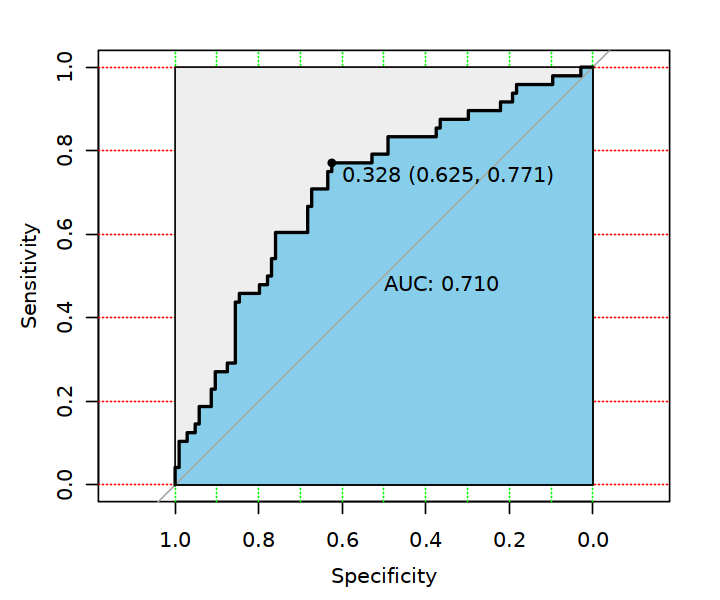

In [93]:
roc_curve <- pROC::roc(as.numeric(fold_test$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")

In [63]:
library(rms)
dd <- datadist(train)
options(datadist="dd")
fit1 <- lrm(Group ~.,
            data = train,x=T,y=T)
cal1 <- calibrate(fit1, method='boot', B=100)

In [108]:
pdf('./figure/fig4.qc1.pdf',width = 5,height = 5)
plot(cal1,
     xlim = c(0,1),
     xlab = "Predicted Probability",
     ylab = "Observed Probability",
     legend = FALSE,
     subtitles = FALSE)
abline(0,1,col = "black",lty = 2,lwd = 2)
lines(cal1[,c("predy","calibrated.orig")], type = "l",lwd = 2,col="red",pch =16)
lines(cal1[,c("predy","calibrated.corrected")], type = "l",lwd = 2,col="green",pch =16)
legend(0.55,0.35,
       c("Apparent","Ideal","Bias-corrected"),
       lty = c(2,1,1),
       lwd = c(2,1,1),
       col = c("black","red","green"),
       bty = "n") # "o"为加边框
dev.off()


n=152   Mean absolute error=0.033   Mean squared error=0.0018
0.9 Quantile of absolute error=0.068



png 
  2

In [94]:
library(rmda)
library(ggDCA)
library(ggplot2)
library(rms)
library(caret)

In [95]:
head(data,2)

,Group,HIST1H4C,PRSS3,TUSC3
,<fct>,<dbl>,<dbl>,<dbl>
GSM2431721,0,8.043072,7.752138,8.290631
GSM2431726,0,9.214012,7.969423,6.774439


In [96]:
set.seed(123)
HIST1H4C.model <- decision_curve(Group ~ HIST1H4C, data = data,
    thresholds = seq(0, 0.8, by = 0.005), bootstraps = 10)
PRSS3.model <- decision_curve(Group ~ PRSS3, data = data,
    thresholds = seq(0, 0.8, by = 0.005), bootstraps = 10)
TUSC3.model <- decision_curve(Group ~ TUSC3, data = data,
    thresholds = seq(0, 0.8, by = 0.005), bootstraps = 10)


ERROR: Error in decision_curve(Group ~ HIST1H4C, data = data, thresholds = seq(0, : is.numeric(outcome) is not TRUE


In [121]:
set.seed(123)
full.model <- decision_curve(Group~HIST1H4C +PRSS3 +TUSC3 ,
                             data = data,
                             thresholds = seq(0, 0.8, by = .005),
                             bootstraps = 10)

Note:  The data provided is used to both fit a prediction model and to estimate the respective decision curve. This may cause bias in decision curve estimates leading to over-confidence in model performance. 



In [123]:
pdf('./figure/fig4.qc2.pdf',width = 5,height = 5)
plot_decision_curve( list(HIST1H4C.model,PRSS3.model,TUSC3.model,full.model),
                    curve.names = c('HIST1H4C.model','PRSS3.model','TUSC3.model',
                                    'full.model'),
                    col = ggsci::pal_npg("nrc")(5),
                    confidence.intervals = FALSE,  #remove confidence intervals
                    cost.benefit.axis = FALSE, #remove cost benefit axis
                    legend.position = "topright") #add the legend
dev.off()

Note: When multiple decision curves are plotted, decision curves for 'All' are calculated using the prevalence from the first DecisionCurve object in the list provided.



png 
  2

In [97]:
fold_pre <- glm(Group~.,data=fold_test,family=binomial())
fold_predict <- predict(fold_pre,type='response',newdata=data)

In [98]:
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following object is masked from 'package:epiDisplay':

    ci


The following objects are masked from 'package:stats':

    cov, smooth, var




In [99]:
colnames(data)

[1] "Group"    "HIST1H4C" "PRSS3"    "TUSC3"

In [100]:
options(repr.plot.width = 6,repr.plot.height = 6)

In [101]:
pdf('./figure/fig5.train.roc.pdf',width = 6,height = 6)
rocobj1 <- plot.roc(data$Group, data$HIST1H4C,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
rocobj2 <- lines.roc(data$Group, data$PRSS3,percent=TRUE, levels=c(0,1),direction="<", col="#008600")
rocobj3 <- lines.roc(data$Group, data$TUSC3,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")
rocobj5 <- lines.roc(data$Group, fold_predict,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")
legend("topleft", legend=c(paste0("HIST1H4C ", round(rocobj1$auc/100,digits = 2)),
                               paste0("PRSS3 ", round(rocobj2$auc/100,digits = 2)),
                               paste0("TUSC3 ", round(rocobj3$auc/100,digits = 2)),
                               paste0("model_predict ", round(rocobj5$auc/100,digits = 2))),
       col=c("#1c61b6", "#008600","#9C6D35","#9F1A70"), lwd=1)
dev.off()

png 
  2

In [138]:
require(cowplot)
require(tidyverse)
require(ggplot2)
require(ggsci)
require(ggpubr)

In [139]:
table(data$Group)


  0   1 
130  60 

In [140]:
data1 = data
data1$Group = ifelse(data1$Group == 1,'MDD','Con')

In [141]:
mydata<-data1 %>% 
  ## 基因表达数据gather,gather的范围应调整
  gather(key="gene",value="Expression",HIST1H4C:TUSC3) %>% 
  ##
  dplyr::select(Group,gene,Expression) 

In [142]:
compare_means( Expression ~ Group, data = mydata, method = 't.test',
              group.by = "gene")
# Box plot facetted by "gene"
p <- ggboxplot(mydata, x = "Group", y = "Expression",
          color = "Group", palette = "jco",
          add = "jitter",
          facet.by = "gene", short.panel.labs = FALSE)
# Use only p.format as label. Remove method name.
#p + stat_compare_means(label =  "p.signif", label.x = 1.5)
p <- ggboxplot(mydata, x = "gene", y = "Expression",
          color = "Group", palette = "nejm",
          add = "jitter")

gene,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
HIST1H4C,Expression,Con,MDD,0.0052800639,0.0110,0.00528,**,T-test
PRSS3,Expression,Con,MDD,0.0006069469,0.0018,0.00061,***,T-test
TUSC3,Expression,Con,MDD,0.0238766451,0.0240,0.02388,*,T-test


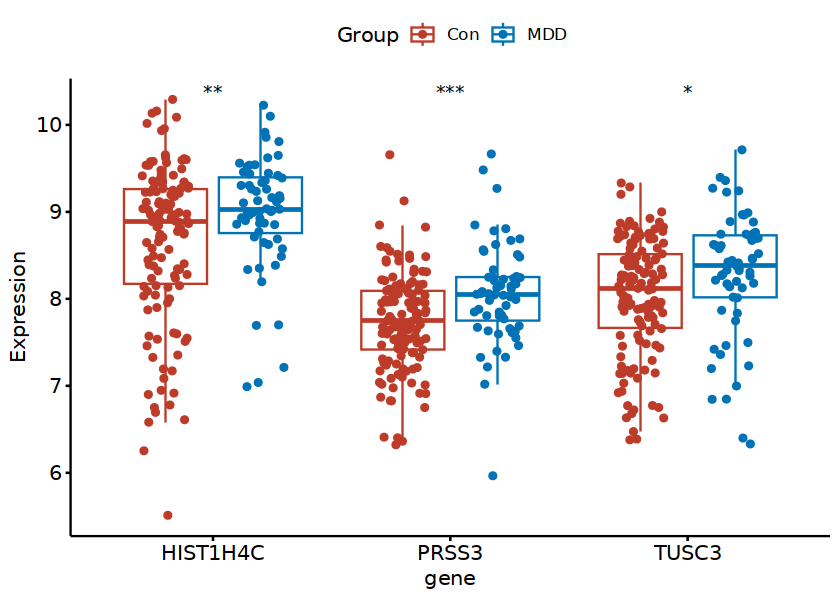

In [143]:
diffgene = as.data.frame(compare_means( Expression ~ Group, data = mydata, method = 't.test',
              group.by = "gene"))
diffgene = rownames(diffgene) = diffgene[,1]
options(repr.plot.height = 5,repr.plot.width = 21)
options(repr.plot.width = 7,repr.plot.height = 5)
p + stat_compare_means(aes(group = Group), label = "p.signif",method = 't.test')

In [145]:
ggsave('./figure/fig6.boxplot.pdf',width = 6,height = 4)

In [147]:
colnames(data)

[1] "Group"    "HIST1H4C" "PRSS3"    "TUSC3"

In [148]:
tend1 = data1[,c( 2:4)] 
gene_cor <- cor(tend1, method = 'pearson')
diag(gene_cor) <- 0
gene_cor <- reshape2::melt(gene_cor)
gene_cor <- subset(gene_cor, value != 0)  #去除0值的相关性
head(gene_cor)

library(circlize)
pdf('./figure/fig7.cor.circle.pdf',height = 6,width = 6)
p= chordDiagram(gene_cor, 
    annotationTrack = c('grid', 'name', 'axis'), #绘制外周圆弧区，显示名称和刻度轴
    grid.col = c(HIST1H4C = 'green3', PRSS3 = 'red', MARCKS = 'orange', TUSC3 = 'purple', SAP130 = 'skyblue'), #定义基因颜色
    col = colorRamp2(c(-1, 0, 1), c('green', 'white', 'red'), transparency = 0.5), #根据相关性大小展示连线的颜色范围
    annotationTrackHeight = c(0.05, 0.05), #名称离圆弧的距离，以及圆弧的宽度
)
dev.off()

,Var1,Var2,value
,<fct>,<fct>,<dbl>
2,PRSS3,HIST1H4C,0.009006129
3,TUSC3,HIST1H4C,-0.113066268
4,HIST1H4C,PRSS3,0.009006129
6,TUSC3,PRSS3,0.195535892
7,HIST1H4C,TUSC3,-0.113066268
8,PRSS3,TUSC3,0.195535892


png 
  2